## __Proyecto 2__

Jorge Caballeros Pérez 20009

Lucía Alejandra Guzmán Dominguez 20262

Pablo Emmanuel Escobar Sandoval 20936

Edwin Eduardo Ramirez Herrer 19946 

## __Descripcion del dataset__

Vamos a realizar el análisis exploratorio de datos (AED) de este conjunto de datos de imágenes en formato TIF. 

El AED es un enfoque para analizar conjuntos de datos para resumir sus principales características, a menudo con métodos visuales.

A continuación se presentan los pasos generales que seguiremos:

1. **Carga de datos y comprensión básica**:
    - Cargar y revisar las metadatos (`tile_meta.csv` y `wsi_meta.csv`).
    - Cargar y revisar las anotaciones (`polygons.jsonl`).
    - Cargar y visualizar algunas imágenes TIF para entender su estructura.
    
2. **Exploración de metadatos**:
    - Estadísticas descriptivas básicas.
    - Distribución de las imágenes en función de la fuente WSI y otros metadatos.
    - Distribución de características demográficas (edad, sexo, raza, etc.) del `wsi_meta.csv`.
    
3. **Exploración de anotaciones**:
    - Conteo y distribución de los diferentes tipos de anotaciones (`blood_vessel`, `glomerulus`, `unsure`).
    - Visualización de algunas imágenes con sus respectivas máscaras de anotación.
    
4. **Exploración de imágenes TIF**:
    - Histograma de intensidades de píxeles.
    - Comparación de características visuales entre diferentes WSIs.



In [4]:
import pandas as pd
import json

# Cargar metadatos
tile_meta = pd.read_csv("tile_meta.csv")
wsi_meta = pd.read_csv("wsi_meta.csv")

# Cargar anotaciones
with open("polygons.jsonl", 'r') as f:
    polygons = [json.loads(line) for line in f]

# Mostrar las primeras filas de cada dataframe y el número de anotaciones
tile_meta.head(), wsi_meta.head(), len(polygons)


(             id  source_wsi  dataset      i      j
 0  0006ff2aa7cd           2        2  16896  16420
 1  000e79e206b7           6        3  10240  29184
 2  00168d1b7522           2        2  14848  14884
 3  00176a88fdb0           7        3  14848  25088
 4  0033bbc76b6b           1        1  10240  43008,
    source_wsi  age sex race  height  weight   bmi
 0           1   58   F    W   160.0    59.0  23.0
 1           2   56   F    W   175.2   139.6  45.5
 2           3   73   F    W   162.3    87.5  33.2
 3           4   53   M    B   166.0    73.0  26.5,
 1633)

### Metadatos de los mosaicos (tiles):

- **id**: Identificador de la imagen.
- **source_wsi**: Identifica la imagen de diapositiva completa (Whole Slide Image, WSI) de la que se extrajo este mosaico.
- **dataset**: El conjunto de datos al que pertenece este mosaico.
- **i, j**: La ubicación de la esquina superior izquierda dentro de la WSI donde se extrajo el mosaico.

Las primeras 5 entradas se muestran arriba.

### Metadatos de las imágenes de diapositiva completa (WSIs):

- **source_wsi**: Identificador de la WSI.
- **age**: Edad del donante del tejido.
- **sex**: Sexo del donante del tejido.
- **race**: Raza del donante del tejido.
- **height**: Altura del donante del tejido (en cm).
- **weight**: Peso del donante del tejido (en kg).
- **bmi**: Índice de masa corporal del donante del tejido.

Las primeras 4 entradas se muestran arriba.

### Anotaciones:

Tenemos un total de 1633 anotaciones en el archivo `polygons.jsonl`.

Aquí están las estadísticas descriptivas de los metadatos:

### Metadatos de los mosaicos (tiles):

- Tenemos un total de 7033 mosaicos en el conjunto de datos.
- Los mosaicos provienen de varias WSIs, con identificadores que varían de 1 a 14.
- La mayoría de los mosaicos pertenecen al conjunto de datos 3.
- Las ubicaciones \(i\) y \(j\) de los mosaicos dentro de las WSIs tienen una variedad de valores, indicando que los mosaicos cubren diversas áreas de las imágenes completas.

### Metadatos de las imágenes de diapositiva completa (WSIs):

- Hay metadatos disponibles para 4 WSIs.
- La edad de los donantes del tejido varía de 53 a 73 años.
- La mayoría de los donantes son mujeres (F) y de raza blanca (W).
- La altura, el peso y el índice de masa corporal (BMI) varían, indicando diversidad en las características físicas de los donantes.

In [5]:
# Estadísticas descriptivas para tile_meta
tile_meta_description = tile_meta.describe(include='all')

# Estadísticas descriptivas para wsi_meta
wsi_meta_description = wsi_meta.describe(include='all')

tile_meta_description, wsi_meta_description


(                  id   source_wsi      dataset             i             j
 count           7033  7033.000000  7033.000000   7033.000000   7033.000000
 unique          7033          NaN          NaN           NaN           NaN
 top     0006ff2aa7cd          NaN          NaN           NaN           NaN
 freq               1          NaN          NaN           NaN           NaN
 mean             NaN     8.205744     2.707806  14296.542585  23227.014930
 std              NaN     4.004251     0.571724   5946.054578  10644.032931
 min              NaN     1.000000     1.000000   1536.000000   2560.000000
 25%              NaN     6.000000     3.000000   9728.000000  15265.000000
 50%              NaN     9.000000     3.000000  13824.000000  22528.000000
 75%              NaN    12.000000     3.000000  18944.000000  29656.000000
 max              NaN    14.000000     3.000000  30208.000000  52753.000000,
         source_wsi        age  sex race     height      weight       bmi
 count     4.


1. **Distribución de mosaicos por source_wsi**:
    - Observamos que la mayoría de los mosaicos provienen de las WSIs con identificadores del 6 al 14, siendo el 9 el que tiene la mayor cantidad.

2. **Distribución de mosaicos por dataset**:
    - La mayoría de los mosaicos pertenecen al conjunto de datos 3, seguido por el conjunto de datos 2. Hay una cantidad menor en el conjunto de datos 1.

3. **Distribución de donantes por sexo**:
    - Hay más donantes femeninas que masculinos en las WSIs para las cuales tenemos metadatos.

4. **Distribución de donantes por raza**:
    - La mayoría de los donantes son de raza blanca, con solo un donante de otra raza.



- **blood_vessel**: Esta es la estructura objetivo de la competencia, y la mayoría de las anotaciones pertenecen a este tipo. Representa los vasos sanguíneos en las imágenes.
- **glomerulus**: Estas son estructuras en forma de bola capilar en el riñón. No hay muchas anotaciones de este tipo en comparación con "blood_vessel", pero es importante tener en cuenta que cualquier predicción dentro de estas estructuras en el conjunto de prueba se contará como falsos positivos.
- **unsure**: Representa estructuras que los expertos anotadores no pueden identificar con confianza como un vaso sanguíneo. Hay muy pocas anotaciones de este tipo.

## __Análisis exploratorio__

                  id   source_wsi      dataset             i             j
count           7033  7033.000000  7033.000000   7033.000000   7033.000000
unique          7033          NaN          NaN           NaN           NaN
top     0006ff2aa7cd          NaN          NaN           NaN           NaN
freq               1          NaN          NaN           NaN           NaN
mean             NaN     8.205744     2.707806  14296.542585  23227.014930
std              NaN     4.004251     0.571724   5946.054578  10644.032931
min              NaN     1.000000     1.000000   1536.000000   2560.000000
25%              NaN     6.000000     3.000000   9728.000000  15265.000000
50%              NaN     9.000000     3.000000  13824.000000  22528.000000
75%              NaN    12.000000     3.000000  18944.000000  29656.000000
max              NaN    14.000000     3.000000  30208.000000  52753.000000
        source_wsi        age  sex race     height      weight       bmi
count     4.000000   4.0000

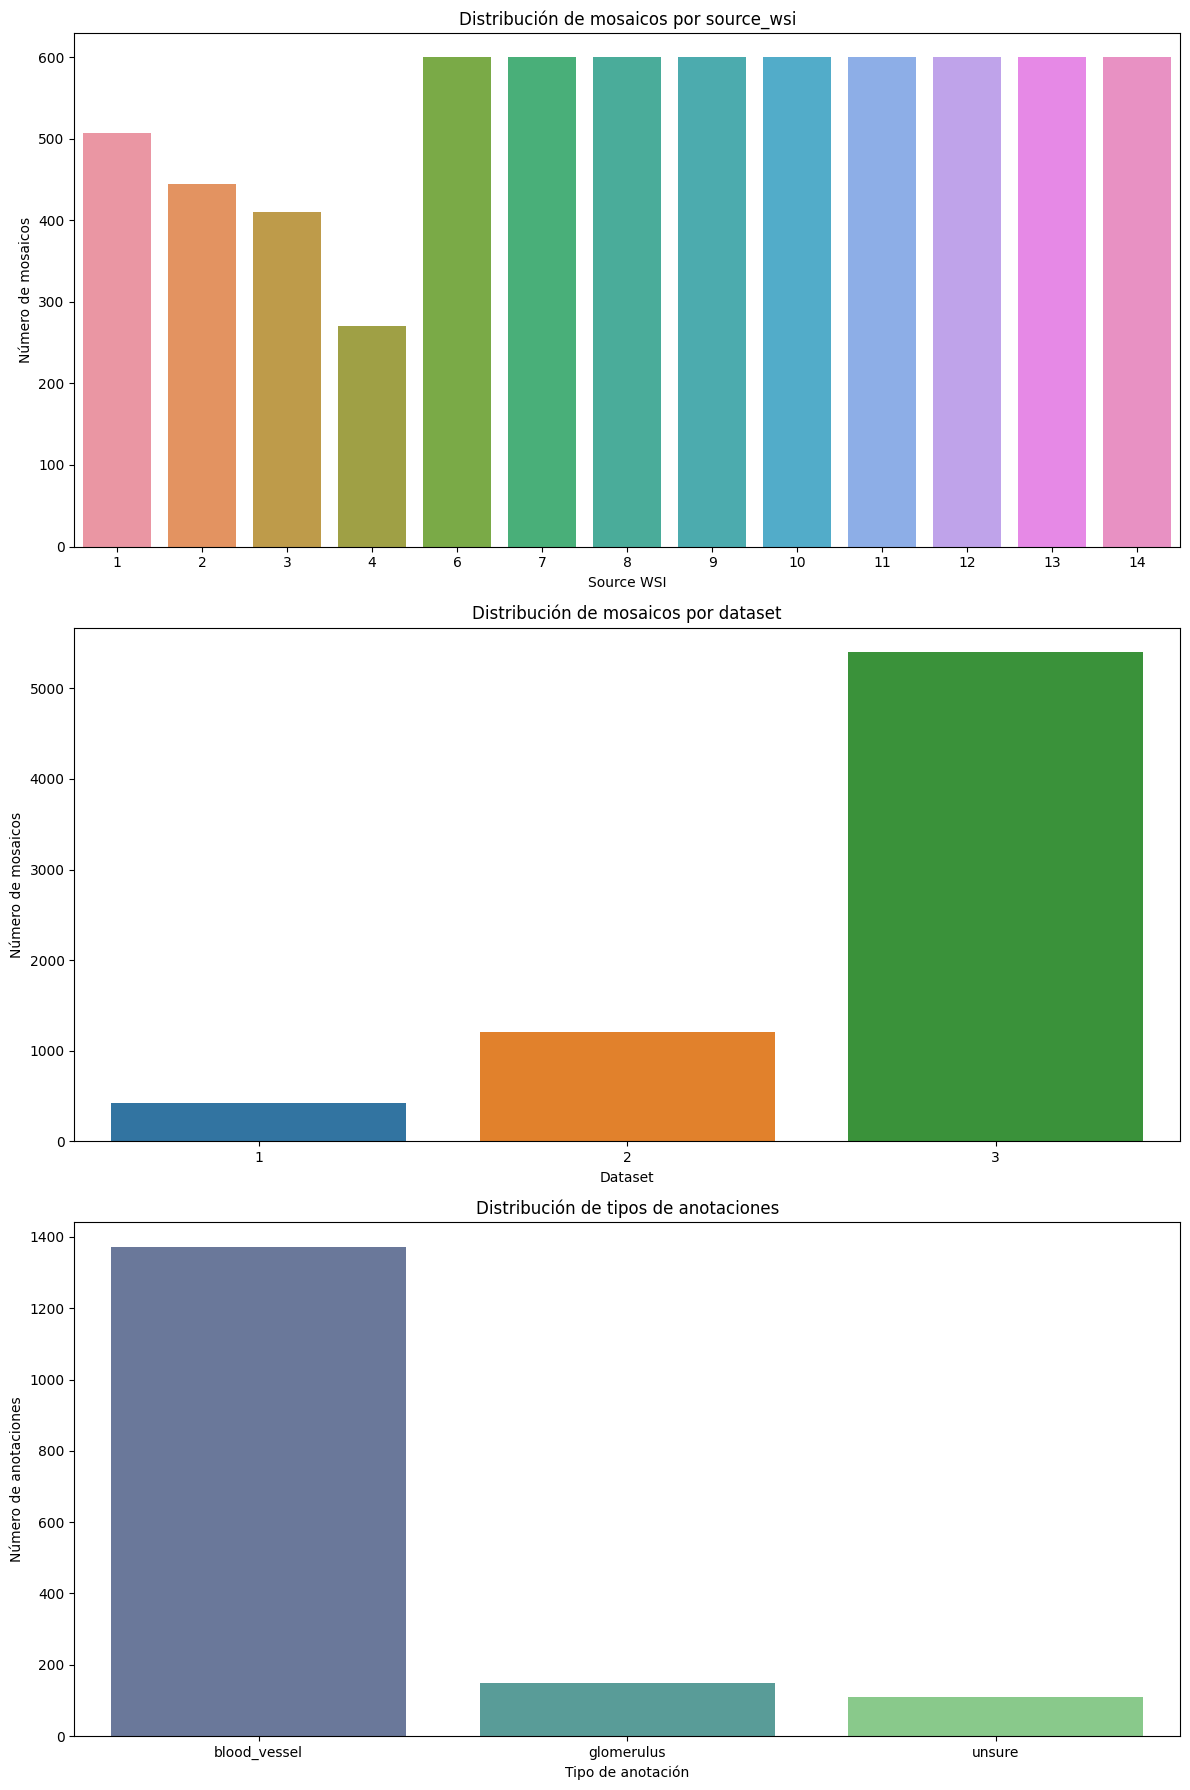

In [12]:

import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar metadatos
tile_meta = pd.read_csv("tile_meta.csv")
wsi_meta = pd.read_csv("wsi_meta.csv")

# Cargar anotaciones
with open("polygons.jsonl", 'r') as f:
    polygons = [json.loads(line) for line in f]

# Crear un DataFrame a partir de las anotaciones
annotations_df = pd.DataFrame(polygons)
annotations_df['annotation_type'] = annotations_df['annotations'].apply(lambda x: x[0]['type'] if x else None)

# Estadísticas descriptivas para tile_meta
tile_meta_description = tile_meta.describe(include='all')
print(tile_meta_description)

# Estadísticas descriptivas para wsi_meta
wsi_meta_description = wsi_meta.describe(include='all')
print(wsi_meta_description)

# Conteo de los diferentes tipos de anotaciones
annotation_counts = annotations_df['annotation_type'].value_counts()
print(annotation_counts)

# Visualización de las distribuciones
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Distribución de mosaicos por source_wsi
sns.countplot(data=tile_meta, x='source_wsi', ax=axes[0])
axes[0].set_title('Distribución de mosaicos por source_wsi')
axes[0].set_xlabel('Source WSI')
axes[0].set_ylabel('Número de mosaicos')

# Distribución de mosaicos por dataset
sns.countplot(data=tile_meta, x='dataset', ax=axes[1])
axes[1].set_title('Distribución de mosaicos por dataset')
axes[1].set_xlabel('Dataset')
axes[1].set_ylabel('Número de mosaicos')

# Distribución de tipos de anotaciones (corregido)
sns.barplot(x=annotation_counts.index, y=annotation_counts.values, alpha=0.8, palette="viridis", ax=axes[2])
axes[2].set_title('Distribución de tipos de anotaciones')
axes[2].set_ylabel('Número de anotaciones')
axes[2].set_xlabel('Tipo de anotación')

plt.tight_layout()
plt.show()



### 1. Investigación del Tema:

**Microvasculatura en la histología renal**:
La microvasculatura se refiere a los vasos sanguíneos más pequeños en el sistema circulatorio, como capilares, arteriolas y vénulas. Estos vasos juegan un papel crucial en la regulación del flujo sanguíneo y la presión arterial. 

En el contexto de la histología renal, la microvasculatura es esencial para la función renal, ya que los riñones requieren un suministro constante de sangre para filtrar y regular el equilibrio de fluidos y electrolitos en el cuerpo. Los vasos sanguíneos (microvasculatura) en las imágenes histológicas permiten la identificación de diversas patologías renales.

**Enfermedad renal y diagnóstico basado en imágenes**:
La enfermedad renal se refiere a cualquier condición que afecte la función renal. Los síntomas pueden incluir fatiga, hinchazón en manos y pies, micción frecuente y espuma en la orina, entre otros. El diagnóstico de enfermedades renales a menudo implica pruebas de sangre y orina, así como imágenes médicas. 

Las imágenes histológicas del riñón, como las proporcionadas en este conjunto de datos, ofrecen una visión detallada de la estructura y morfología del tejido renal. Identificar anomalías o cambios en la microvasculatura puede ser indicativo de ciertas patologías.

### 2. Análisis del Problema y Datos:
El objetivo de este conjunto de datos es localizar estructuras de microvasculatura (vasos sanguíneos) dentro de diapositivas histológicas de riñón humano. Estas estructuras son esenciales para comprender la salud y función del tejido renal. Las anotaciones proporcionadas indican la ubicación de los vasos sanguíneos, glomérulos (una estructura esencial en la filtración renal) y áreas "inseguras" que no pudieron ser identificadas con confianza.

### 3. Limpieza y Preprocesamiento:
Hasta ahora, hemos cargado y revisado las metadatos y anotaciones. No hemos realizado tareas de limpieza específicas, ya que aún no hemos identificado datos faltantes o inconsistentes. Sin embargo, en un análisis real, se deberían considerar pasos como la verificación de datos faltantes, la eliminación de duplicados y la corrección de posibles errores en las anotaciones.

### 4. Análisis Exploratorio de Datos:
**a. Descripción de variables y observaciones**:
Hemos descrito las variables disponibles en los metadatos y anotaciones anteriormente.

**b. Resumen de variables numéricas y tablas de frecuencia**:
Las variables numéricas disponibles son principalmente las coordenadas de ubicación de los mosaicos. También tenemos datos demográficos como edad, altura, peso y BMI del donante del tejido. Las tablas de frecuencia se han generado para las WSIs de origen y los conjuntos de datos.

**c. Cruce de variables importantes**:
Hasta ahora, hemos visualizado la distribución de mosaicos en función de la fuente WSI y el conjunto de datos, así como la distribución de donantes según el sexo y la raza.

**d. Gráficos exploratorios**:
Se han generado gráficos de barras para visualizar la distribución de mosaicos y donantes.

### 5. Conclusiones:
- El conjunto de datos proporciona información detallada sobre la histología renal, centrada en la identificación de la microvasculatura.
- Las anotaciones ayudarán a entrenar modelos para identificar vasos sanguíneos, glomérulos y áreas inciertas en imágenes histológicas.
- Se necesita una atención especial al procesar imágenes con compresión LZW, lo que requiere herramientas y paquetes específicos.
- Las imágenes provienen de diversos WSIs, lo que sugiere una diversidad en los datos que pueden ayudar en la robustez del modelo.
